# Drug Classification

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

## 1. Data Exploration

In [80]:
df = pd.read_csv('Drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


Features description from each patient:
- Age
- Sex
- BP: Blood Pressure
- Cholesterol
- Na: Sodium level of patient experiment.
- K: Potassium level of patient experiment.
- Type of Drug that prescribed with doctor.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [83]:
df.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [84]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug'], dtype='object')

In [85]:
df.shape

(200, 7)

How many null and duplicated values there are:

In [87]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

In [88]:
df.duplicated().sum()

np.int64(0)

### Analysis & Visualization

We start with the **numerical features distribution**: *Age*, *Na* and *Sodium*.

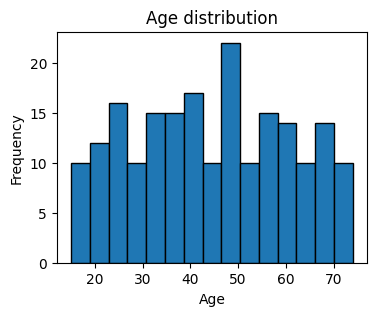

In [91]:
plt.figure(figsize= (4,3))
plt.hist(df['Age'], bins=15, edgecolor='black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

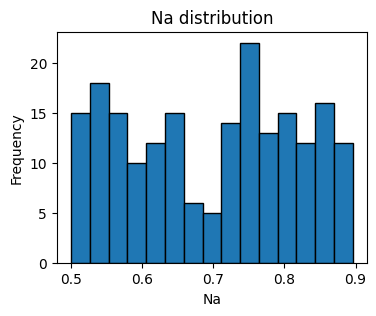

In [92]:
plt.figure(figsize= (4,3))
plt.hist(df['Na'], bins=15, edgecolor='black')
plt.title('Na distribution')
plt.xlabel('Na')
plt.ylabel('Frequency')
plt.show()

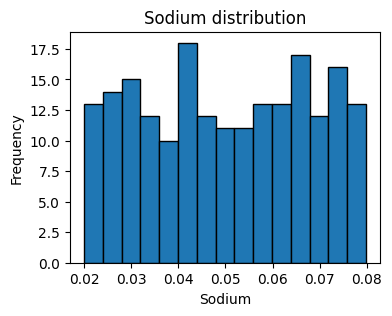

In [93]:
plt.figure(figsize= (4,3))
plt.hist(df['K'], bins=15, edgecolor='black')
#df['K'].plot(kind='hist', bins=15, edgecolor='black') Equivalent
plt.title('Sodium distribution')
plt.xlabel('Sodium')
plt.ylabel('Frequency')
plt.show()

Now the **categorical features distribution**: *Drug*, *Sex*, *Blood Pressure* and *Cholesterol*.

In [95]:
drug_counts = df['Drug'].value_counts()
drug_counts

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

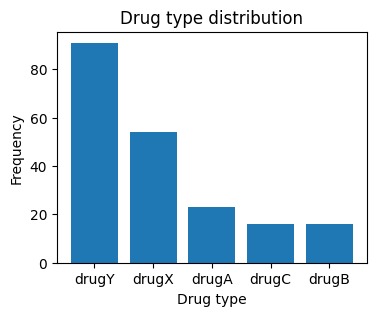

In [96]:
plt.figure(figsize= (4,3))
plt.bar(drug_counts.index, drug_counts.values)
#drug_counts.plot(kind='bar')
plt.title('Drug type distribution')
plt.xlabel('Drug type')
plt.ylabel('Frequency')
plt.show()

In [97]:
sex_counts = df['Sex'].value_counts()
sex_counts

Sex
M    104
F     96
Name: count, dtype: int64

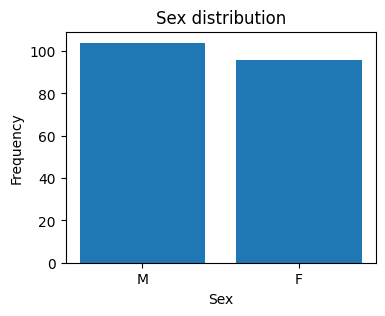

In [98]:
plt.figure(figsize= (4,3))
plt.bar(sex_counts.index, sex_counts.values)
plt.title('Sex distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

In [99]:
bp_counts = df['BP'].value_counts()
bp_counts

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

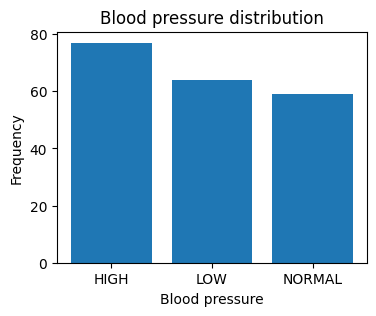

In [100]:
plt.figure(figsize= (4,3))
plt.bar(bp_counts.index, bp_counts.values)
plt.title('Blood pressure distribution')
plt.xlabel('Blood pressure')
plt.ylabel('Frequency')
plt.show()

In [101]:
cholesterol_counts = df['Cholesterol'].value_counts()
cholesterol_counts

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

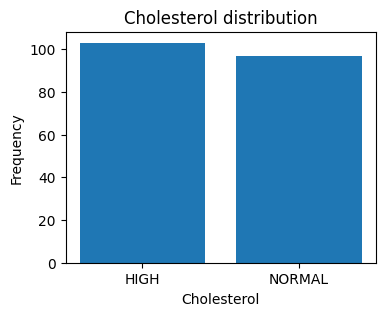

In [102]:
plt.figure(figsize= (4,3))
plt.bar(cholesterol_counts.index, cholesterol_counts.values)
plt.title('Cholesterol distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

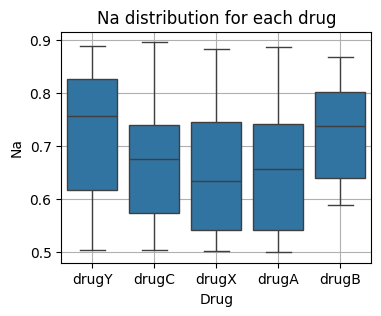

In [103]:
# Boxplot for Na per drug
plt.figure(figsize= (4,3))
sns.boxplot(x='Drug', y='Na', data=df)
plt.title('Na distribution for each drug')
plt.ylabel('Na')
plt.grid(True)
plt.show()

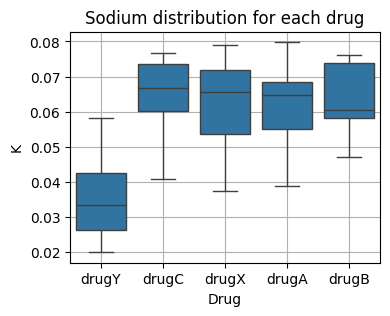

In [104]:
# Boxplot for K per drug
plt.figure(figsize= (4,3))
sns.boxplot(x='Drug', y='K', data=df)
plt.title('Sodium distribution for each drug')
plt.ylabel('K')
plt.grid(True)
plt.show()

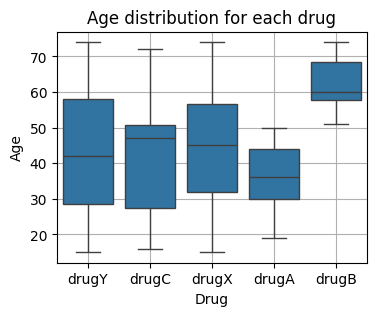

In [105]:
# Boxplot for age per drug
plt.figure(figsize= (4,3))
sns.boxplot(x='Drug', y='Age', data=df)
plt.title('Age distribution for each drug')
plt.ylabel('Age')
plt.grid(True)
plt.show()

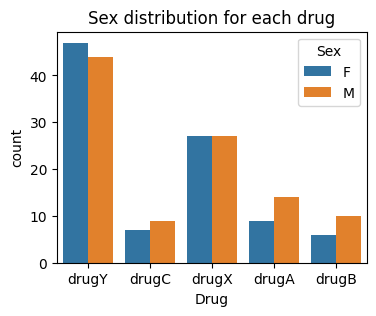

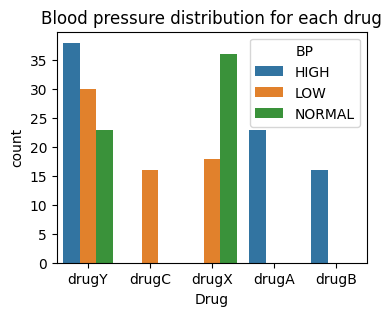

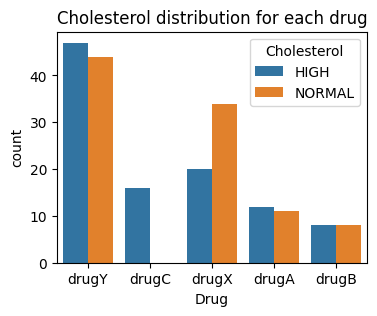

In [106]:
plt.figure(figsize= (4,3))
sns.countplot(x='Drug', hue='Sex', data=df)
plt.title('Sex distribution for each drug')
plt.show()

plt.figure(figsize= (4,3))
sns.countplot(x='Drug', hue='BP', data=df)
plt.title('Blood pressure distribution for each drug')
plt.show()

plt.figure(figsize= (4,3))
sns.countplot(x='Drug', hue='Cholesterol', data=df)
plt.title('Cholesterol distribution for each drug')
plt.show()

We see the **relation between numerical features** with the correlation matrix and its heatmap:

In [108]:
df.corr(numeric_only=True)

,Age,Na,K
Age,1.000000,0.100371,0.111491
Na,0.100371,1.000000,0.017335
K,0.111491,0.017335,1.000000


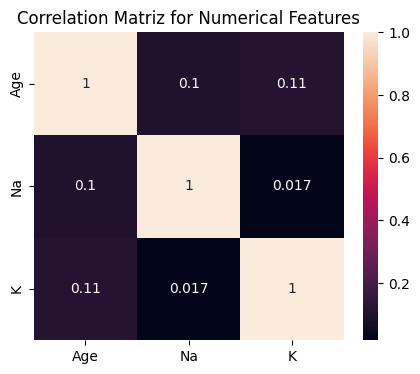

In [109]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.title('Correlation Matriz for Numerical Features')
plt.show()

In [110]:
cross_sex = pd.crosstab(df['Drug'], df['Sex'])
cross_sex

Sex,F,M
Drug,,
drugA,9,14
drugB,6,10
drugC,7,9
drugX,27,27
drugY,47,44


## 2. Data Preprocessing

### Define the input (features) and output (target):

In [211]:
X = df.drop('Drug', axis = 1)
y = df['Drug'] 
X,y

(     Age Sex      BP Cholesterol        Na         K
 0     23   F    HIGH        HIGH  0.792535  0.031258
 1     47   M     LOW        HIGH  0.739309  0.056468
 2     47   M     LOW        HIGH  0.697269  0.068944
 3     28   F  NORMAL        HIGH  0.563682  0.072289
 4     61   F     LOW        HIGH  0.559294  0.030998
 ..   ...  ..     ...         ...       ...       ...
 195   56   F     LOW        HIGH  0.848774  0.073380
 196   16   M     LOW        HIGH  0.743021  0.061886
 197   52   M  NORMAL        HIGH  0.549945  0.055581
 198   23   M  NORMAL      NORMAL  0.784520  0.055959
 199   40   F     LOW      NORMAL  0.683503  0.060226
 
 [200 rows x 6 columns],
 0      drugY
 1      drugC
 2      drugC
 3      drugX
 4      drugY
        ...  
 195    drugC
 196    drugC
 197    drugX
 198    drugX
 199    drugX
 Name: Drug, Length: 200, dtype: object)

### Training & Testing

In [213]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We convert categorical variables into a numerical format, binory values. Also we apply standard scaling to numerical vairables to normalize the data.

In [117]:
categorical_cols = ['Sex', 'BP', 'Cholesterol']
numerical_cols = ['Age', 'Na', 'K']
preprocessor = ColumnTransformer( # Column transformer
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fitting the transformer
#x_train_processed = preprocessor.fit_transform(x_train)
#x_test_processed = preprocessor.transform(x_test)

## 3. ML Models

We will train 4 ML models:
- Logistic Regression
- Decision Trees
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)

### Pipelines of candidates

In [233]:
pipe_lr  = Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=500, n_jobs=None))])
pipe_svc = Pipeline([('pre', preprocessor), ('clf', SVC())])
pipe_knn = Pipeline([('pre', preprocessor), ('clf', KNeighborsClassifier())])
pipe_dt  = Pipeline([('pre', preprocessor), ('clf', DecisionTreeClassifier(random_state=42))])
pipe_rf  = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(random_state=42))])

models = {
    'LogisticRegression': pipe_lr,
    'SVC': pipe_svc,
    'KNN': pipe_knn,
    'DecisionTree': pipe_dt,
    'RandomForest': pipe_rf
}

### Cross Validation comparation

We test the model on multiple splits to confirm the result is not just by chance. Data is split into 5 folds, trained and tested. 

In [237]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    rows.append({'model': name, 'cv_mean': scores.mean(), 'cv_std': scores.std()})

cv_table = pd.DataFrame(rows).sort_values('cv_mean', ascending = False).reset_index(drop=True)
cv_table

,model,cv_mean,cv_std
0,LogisticRegression,0.955,0.040000
1,SVC,0.925,0.041833
2,RandomForest,0.910,0.056125
3,DecisionTree,0.875,0.035355
4,KNN,0.860,0.025495


Based in the results, Logistic Regression is the model that best generalizes as it has the highest mean accuracy with a small standar deviation --> High accuracy and consistent results 

In [245]:
best_name = cv_table.iloc[0]['model']
best_pipeline = models[best_name]

best_pipeline.fit(x_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Na', 'K']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'BP',
                                                   'Cholesterol'])])),
                ('clf', LogisticRegression(max_iter=500))])

Best by Cross Validation: LogisticRegression
Test accuracy: 0.975
Classification report: 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        11
       drugY       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



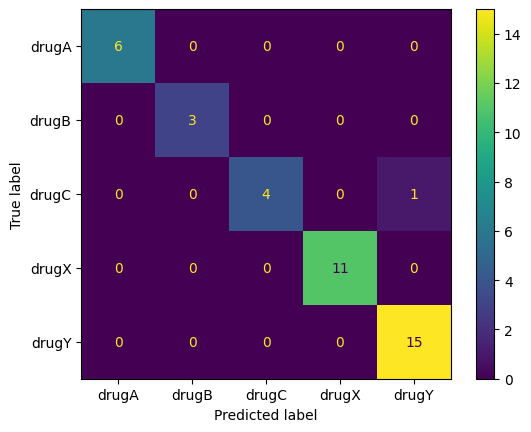

In [251]:
y_pred = best_pipeline.predict(x_test)

print(f"Best by Cross Validation: {best_name}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification report: \n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(best_pipeline, x_test, y_test)
plt.show()

### Hyperparameter Tuning

Best params (LR): {'clf__C': 10.0, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best CV accuracy (LR): 0.95625
Test accuracy (tuned LR): 1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



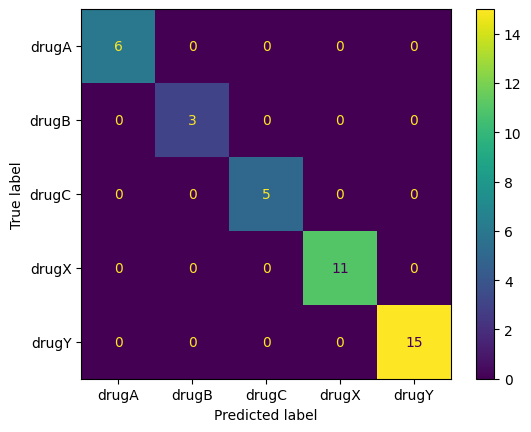

In [259]:
param_rid_lr = {
    'clf__penalty': ['l2'],
    'clf__C':[0.1, 1.0, 3.0, 10.0],
    'clf__solver': ['lbfgs', 'liblinear'],
    'clf__class_weight': [None, 'balanced']
}
# We clone the pipeline for every combination in the grid. For each combo it runs 5 fold CV.
gs_lr = GridSearchCV(pipe_lr, param_rid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
gs_lr.fit(x_train, y_train) # All search is done on the training data

print('Best params (LR):', gs_lr.best_params_)
print('Best CV accuracy (LR):', gs_lr.best_score_)

y_pred_gs = gs_lr.best_estimator_.predict(x_test)
print("Test accuracy (tuned LR):", accuracy_score(y_test, y_pred_gs))
print(classification_report(y_test, y_pred_gs))
ConfusionMatrixDisplay.from_estimator(gs_lr.best_estimator_, x_test, y_test); plt.show()

# Updated pipeline with the best combination of parameters
best_pipeline = gs_lr.best_estimator_  

After hiperameter tuning, we see all predictions are correct.

## 4. Interpretability

In [274]:
feature_names = best_pipeline.named_steps['pre'].get_feature_names_out()
clf = best_pipeline.named_steps['clf']

for i, cls in enumerate(clf.classes_):
    coefs = clf.coef_[i]
    top = np.argsort(np.abs(coefs))[::-1][:8]
    print(f"\nTop features for class {cls}:")
    for j in top:
        print(f"{feature_names[j]}  coef={coefs[j]:.3f}")


Top features for class drugA:
cat__BP_HIGH  coef=1.686
num__K  coef=0.905
num__Age  coef=-0.900
cat__BP_LOW  coef=-0.861
cat__BP_NORMAL  coef=-0.819
num__Na  coef=-0.668
cat__Sex_M  coef=0.097
cat__Sex_F  coef=-0.090

Top features for class drugB:
cat__BP_HIGH  coef=1.483
num__Age  coef=1.277
cat__BP_LOW  coef=-0.821
num__K  coef=0.712
cat__BP_NORMAL  coef=-0.665
num__Na  coef=0.166
cat__Sex_M  coef=-0.097
cat__Sex_F  coef=0.094

Top features for class drugC:
cat__BP_LOW  coef=1.608
num__K  coef=1.090
cat__Cholesterol_NORMAL  coef=-0.993
cat__Cholesterol_HIGH  coef=0.990
cat__BP_HIGH  coef=-0.855
cat__BP_NORMAL  coef=-0.755
num__Na  coef=-0.322
num__Age  coef=-0.275

Top features for class drugX:
cat__BP_HIGH  coef=-2.075
cat__BP_NORMAL  coef=1.881
num__K  coef=0.820
cat__Cholesterol_NORMAL  coef=0.768
cat__Cholesterol_HIGH  coef=-0.761
num__Na  coef=-0.645
cat__Sex_F  coef=0.265
cat__Sex_M  coef=-0.259

Top features for class drugY:
num__K  coef=-3.526
num__Na  coef=1.468
cat__BP_NOR

Conclusions:
- **DrugA**: favors **High BP** and **higher K**, disfavored by **higher Na** and **older age**.
- **DrugB**: favored by **High BP** and **older age**, disfavored by **Low BP** and **Normal BP**.
- **DrugC**: favored by **Low BP** and **higher K**, disfavored by **normal cholesterol** and **High BP**.
- **DrugX**: favored by **Normal BP** and **higher K**, disfavored by **high cholesterol** and **High BP**.
- **DrugY**: favored by **higher Na**, disfavored by **higher K**.

In [264]:
from sklearn.inspection import permutation_importance

r = permutation_importance(best_pipe, x_test, y_test,
                           n_repeats=20, random_state=42, n_jobs=-1)
top = r.importances_mean.argsort()[::-1][:10]
print("\nPermutation importance (top 10):")
for j in top:
    print(f"{feature_names[j]} -> {r.importances_mean[j]:.4f}")



Permutation importance (top 10):
cat__BP_HIGH -> 0.4388
num__K -> 0.3650
cat__Sex_M -> 0.1850
cat__Sex_F -> 0.1350
num__Age -> 0.1050
num__Na -> 0.0075


**Blood Pressure** and **Potassium (K)** are the most influential features globally (highest permutation importance).